In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from functions import *


In [2]:
diplotype_df = pd.read_parquet('/home/jupyter-yusuf/Consensus/output/3_diplotypes.parquet')

In [4]:
diplotype_df.head()

,diplotype,AC,AF,AC_C,AF_C,AF_GA_C,AC_I,AF_I,AF_GA_I,AC_M,AF_M,AF_GA_M,AC_O,AF_O,AF_GA_O,activity_value,phenotype
0,*1/*10+*36,248,16.478405,223.0,14.817276,19.595782,2.0,0.132890,1.212121,23.0,1.528239,11.5,0.0,0.0,0.0,1.25,NM
1,*10+*36/*10+*36,164,10.897010,152.0,10.099668,13.356766,1.0,0.066445,0.606061,11.0,0.730897,5.5,0.0,0.0,0.0,0.50,IM
2,*10/*10+*36,152,10.099668,132.0,8.770764,11.599297,1.0,0.066445,0.606061,19.0,1.262458,9.5,0.0,0.0,0.0,0.50,IM
3,*1/*1,119,7.906977,76.0,5.049834,6.678383,23.0,1.528239,13.939394,20.0,1.328904,10.0,0.0,0.0,0.0,2.00,NM
4,*1/*10,111,7.375415,77.0,5.116279,6.766257,2.0,0.132890,1.212121,32.0,2.126246,16.0,0.0,0.0,0.0,1.25,NM


/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


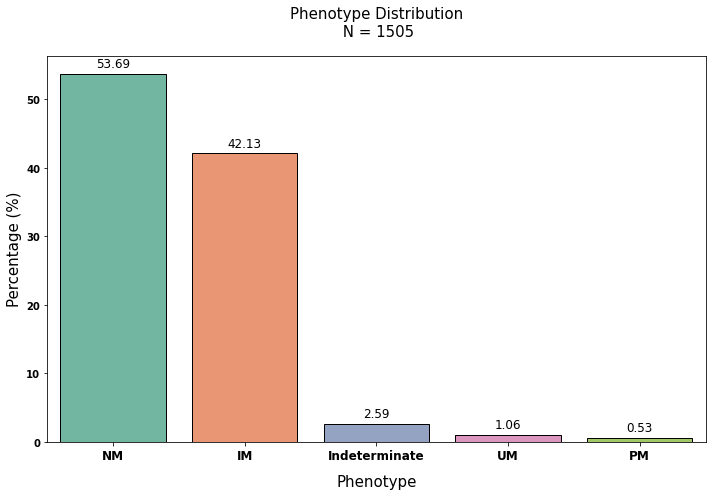

In [5]:
barplot_frequency(diplotype_df.groupby('phenotype')['AF'].sum().reset_index().sort_values(by='AF', ascending=False),
                  x_col='phenotype', y_col='AF', 
                  xlabel='Phenotype', ylabel='Percentage (%)', 
                  title=f'Phenotype Distribution\n N = {int(diplotype_df["AC"].sum())}', 
                  figsize=(10, 7), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette='Set2',
                  grid=False, ci=None)


In [6]:
data = pd.melt(diplotype_df, id_vars=['diplotype', 'phenotype'], value_vars=['AF_GA_C', 'AF_GA_I', 'AF_GA_M'], var_name='genetic_ancestry', value_name='percentage')
data = data.replace({'AF_GA_C': 'Chinese', 'AF_GA_I': 'Indian', 'AF_GA_M': 'Malay'})


/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


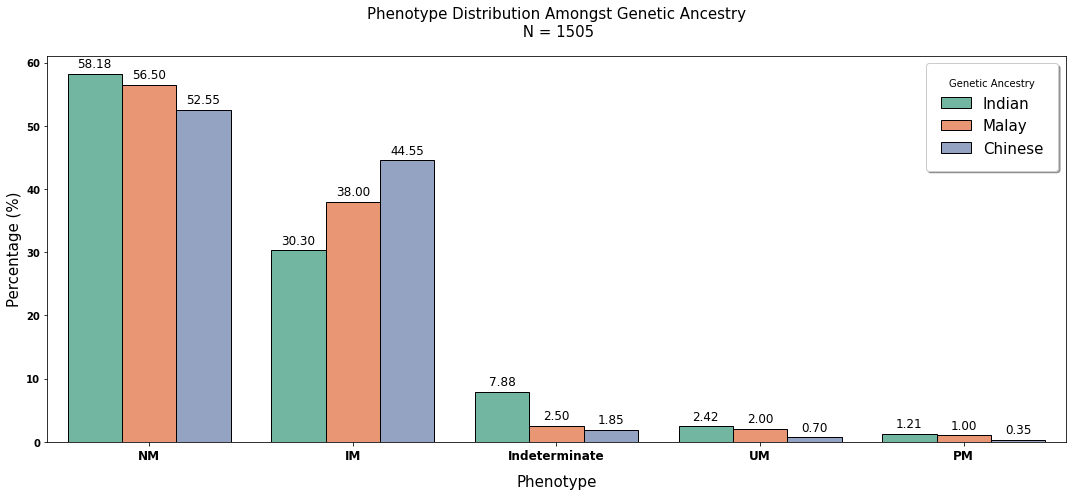

In [7]:
barplot_frequency(data.groupby(['phenotype', 'genetic_ancestry'])['percentage'].sum().reset_index().sort_values(by='percentage', ascending=False),
                  x_col='phenotype', y_col='percentage', 
                  xlabel='Phenotype', ylabel='Percentage (%)', 
                  title=f'Phenotype Distribution Amongst Genetic Ancestry\n N = {int(diplotype_df["AC"].sum())}', 
                  figsize=(15, 7), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette='Set2',
                  grid=False, ci=None, hue = 'genetic_ancestry', legend='Genetic Ancestry')